In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [4]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  501 of 501 completed


In [5]:
rs = prices.apply(np.log).diff(1)

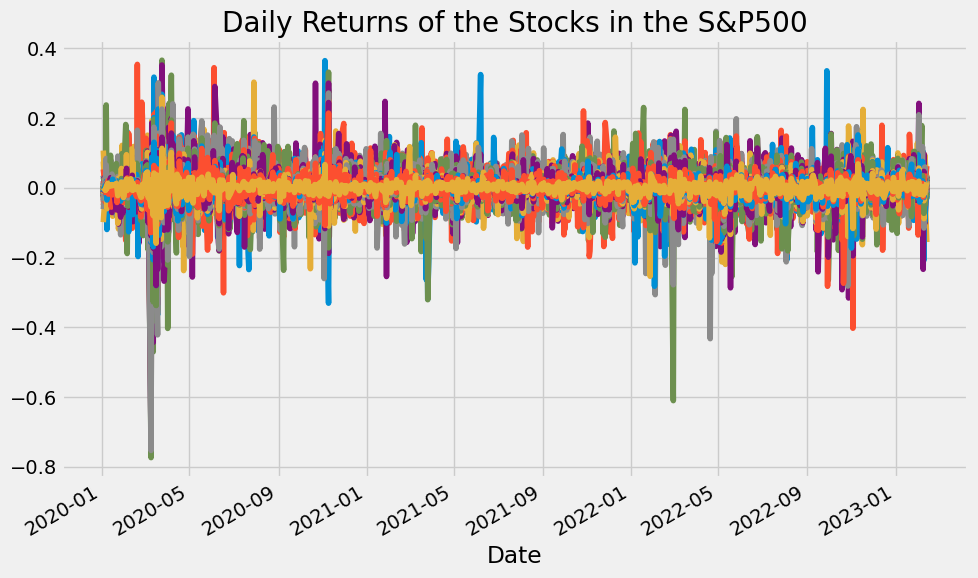

In [6]:
# rs = rs.set_index("timestamp")
rs.plot(legend = 0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

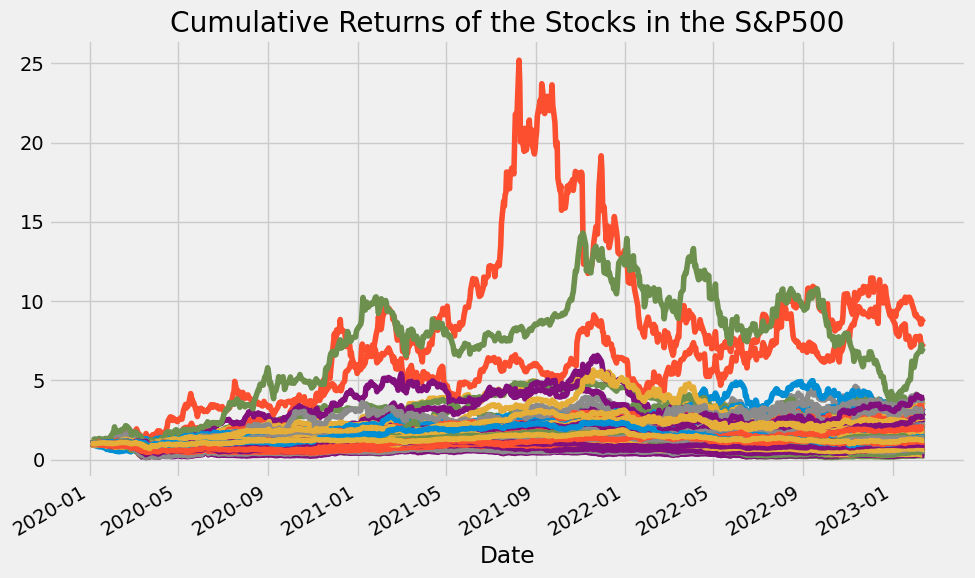

In [7]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

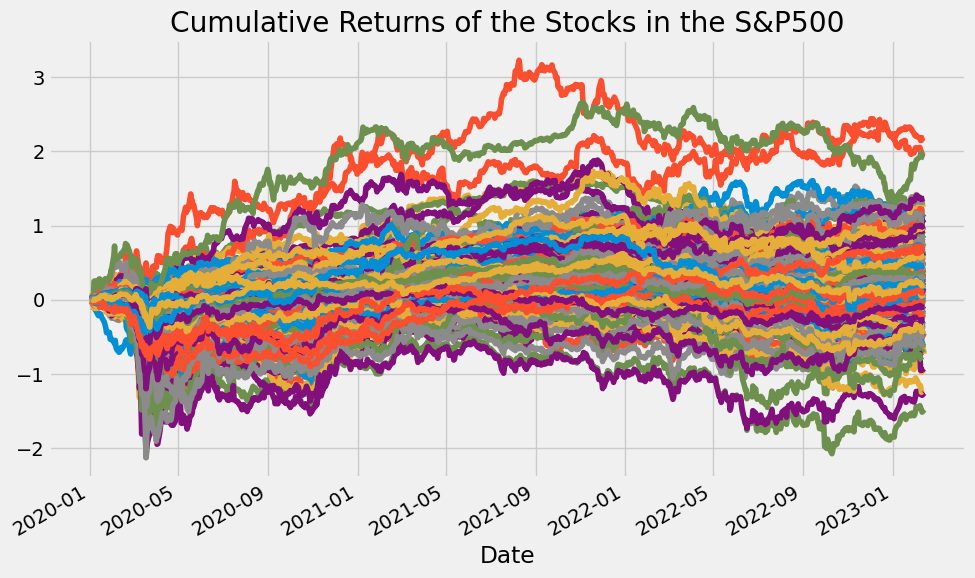

In [8]:
(rs.cumsum()).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [9]:
from sklearn.decomposition import PCA

In [10]:
print(rs.fillna(0))
print(rs.index)

                                  A       AAL       AAP      AAPL      ABBV  \
Date                                                                          
2020-01-02 00:00:00-05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-03 00:00:00-05:00 -0.016186 -0.050769  0.000063 -0.009770 -0.009537   
2020-01-06 00:00:00-05:00  0.002952 -0.012007 -0.016571  0.007937  0.007861   
2020-01-07 00:00:00-05:00  0.003061 -0.003667 -0.011933 -0.004714 -0.005721   
2020-01-08 00:00:00-05:00  0.009825  0.022522 -0.011555  0.015958  0.007063   
...                             ...       ...       ...       ...       ...   
2023-02-07 00:00:00-05:00  0.014801  0.002361 -0.001320  0.019062  0.000827   
2023-02-08 00:00:00-05:00 -0.000583  0.000589 -0.017650 -0.017810 -0.003658   
2023-02-09 00:00:00-05:00 -0.013299 -0.018436  0.020551 -0.006936  0.027890   
2023-02-10 00:00:00-05:00  0.001115 -0.023073 -0.000724  0.002453  0.022279   
2023-02-13 00:00:00-05:00  0.008811  0.011603 -0.003

In [11]:
pca = PCA(5).fit(rs.fillna(0).transpose())

In [14]:
print(pca.components_.shape)

(5, 784)


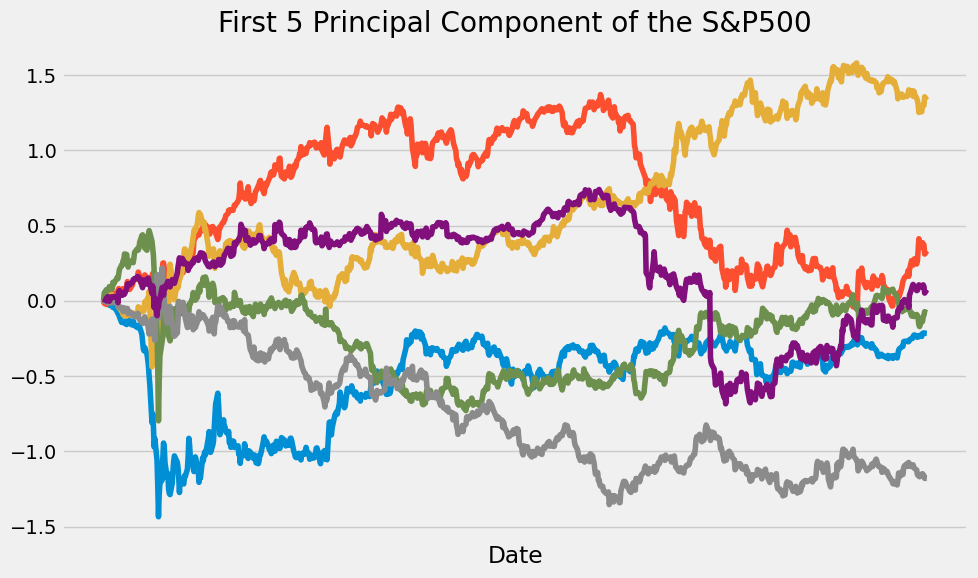

In [12]:
# pc1 = pd.Series(index=rs.columns, data=pca.components_.transpose())
pc5 = pd.DataFrame(pca.components_.transpose(), columns = ['0', '1','2','3','4'])
pc5.index = rs.index
pc5.cumsum().plot(legend = 0, figsize=(10,6), xticks=[], grid=True, title='First 5 Principal Component of the S&P500')
plt.plot(rs.index, rs['NFLX'].cumsum())
plt.tight_layout()
plt.savefig('tmp.png')

## Plot the first component (market) in feature space

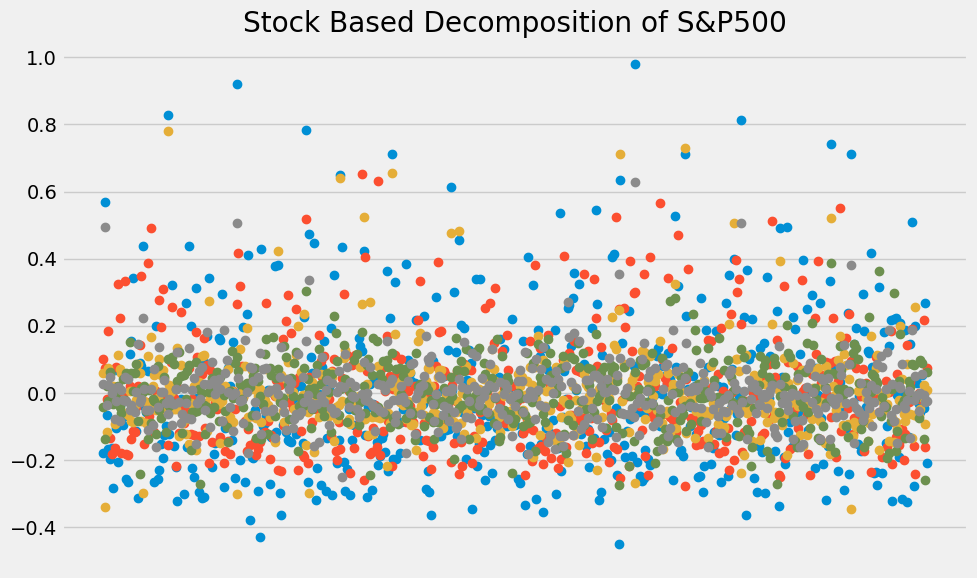

In [13]:
X = pca.transform(rs.fillna(0).transpose());
pcX = pd.DataFrame(X, columns = ['0','1','2','3','4'])
pcX.plot(legend = 0, figsize=(10,6), xticks=[], grid=True, title='Stock Based Decomposition of S&P500', style='o')
pcX.index = rs.columns
plt.tight_layout()
plt.savefig('first component.png')

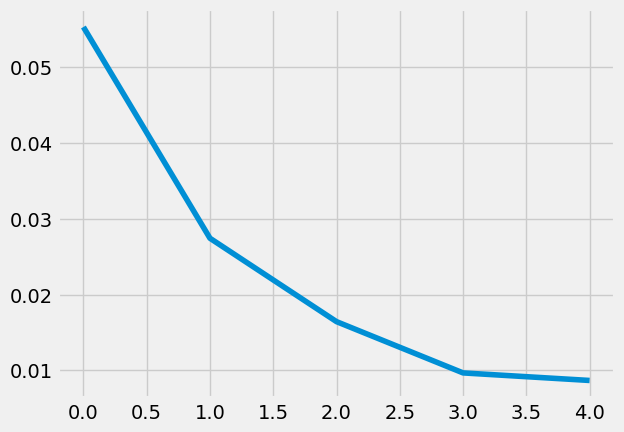

In [17]:
plt.plot(pca.explained_variance_)

In [18]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

NameError: name 'pc1' is not defined

In [69]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


C:\Users\Yuelong Li\AppData\Local\Temp\ipykernel_13380\3435316070.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)


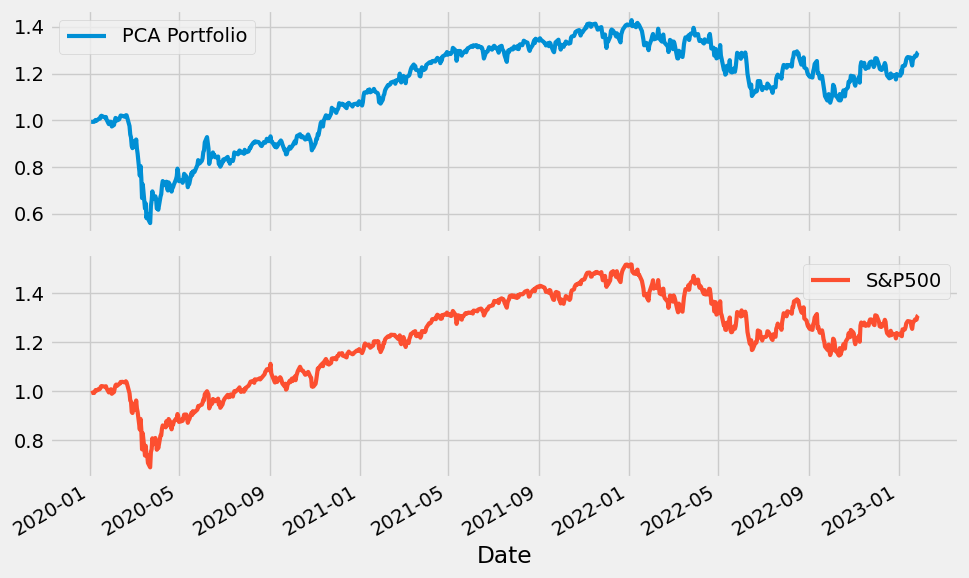

In [70]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

In [70]:
print(pcX.transpose()['AAPL'])

0   -0.166640
1    0.185855
2    0.075595
3   -0.024419
4    0.024405
Name: AAPL, dtype: float64


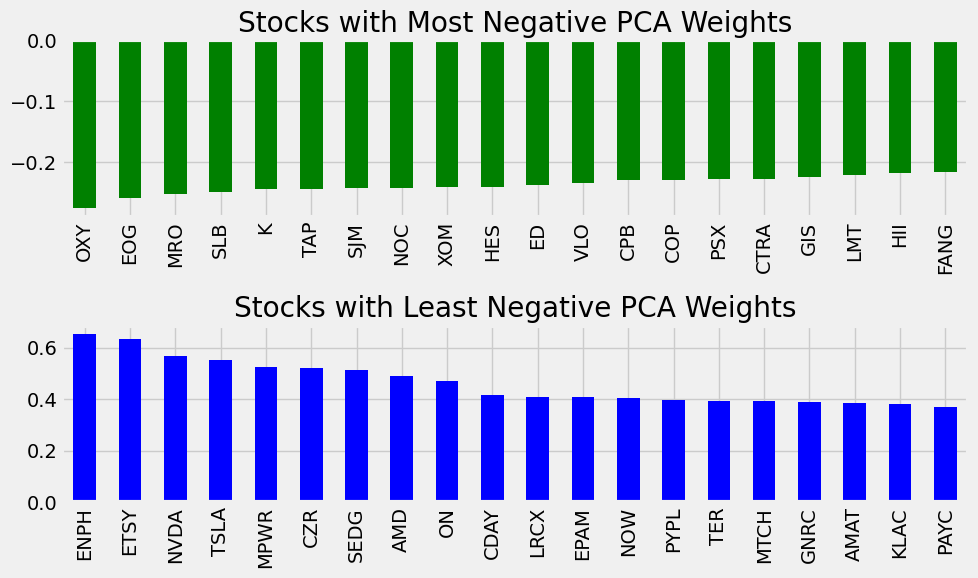

In [37]:
fig, ax = plt.subplots(2,1, figsize=(10,6))

pcX['1'].nsmallest(20).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pcX['1'].nlargest(20).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')